In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [2]:
pwd

'/Users/mingyuanma/Desktop/HAI'

In [31]:
df = pd.read_csv("../S.csv")
# df = df[["ResponseId","round","tick","orderId","taskId","taskTicks","workerId","workerTicks"]]
# df["label"] = ["2"]*df.shape[0]
df = df.iloc[:,0:8]

In [28]:
s1_label = pd.read_csv("../s1_label.csv")
s1_label.columns = s1_label.iloc[0]
s1_label = s1_label.drop(0, axis=0)
s1_label = s1_label[(s1_label["Label"] == "3") | (s1_label["Label"] == "2")]
s1_label = s1_label[["ResponseId","Label"]]
s1_label

,ResponseId,Label
1,R_09f8RCjNyCadwPv,3
4,R_0dkmFxzVGbM4H17,3
5,R_0kTTXuzLnqZsQzT,2
7,R_10GbVmPNCebUOBA,3
8,R_10VgfXmESzXzuNR,2
...,...,...
243,R_uqBgjSJRC3HNk9H,3
244,R_vMpudMaMIAfBShP,2
245,R_wZQyUQosD7jAiC5,3
247,R_yBZYkqf9LaJZxFn,3


In [33]:
df = df.merge(s1_label, left_on="ResponseId", right_on="ResponseId")

In [40]:
df = df.rename(columns={"Label":"label"})
df["label"] = df["label"].astype(int)
df

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId,workerTicks,label
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1,0,3
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2,0,3
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3,0,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0,0,3
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...
59914,R_yK1zeitEqOJSgEx,6,36,0,0,0,0,0,3
59915,R_yK1zeitEqOJSgEx,6,36,0,0,0,0,0,3
59916,R_yK1zeitEqOJSgEx,6,37,4,3,2,2,0,3
59917,R_yK1zeitEqOJSgEx,6,37,0,0,0,0,0,3


In [68]:
#######T1
T1 = pd.read_csv("../data/phase2/combined2.csv")
T1 = T1[T1["round"] <= 2]
T1 = T1[(T1['label'] == 2) | (T1['label'] == 9)]
df=T1

In [69]:
from tqdm import tqdm
def get_feature(df):
    ids = []
    rounds = []
    chef_chop = []
    chef_cook = []
    chef_plate = []
    chef_idle = []
    
    sou_chop = []
    sou_cook = []
    sou_plate = []
    sou_idle = []
    
    server_chop = []
    server_cook = []
    server_plate = []
    server_idle = []
    
    label = []
    label_2 = []
    
    for player in tqdm(set(np.array(df["ResponseId"]))):
        for i in np.arange(1,3):
            tem = df[(df["ResponseId"] == player) & (df["round"] == i)]
            if len(tem) != 0: # no response there
                ids.append(player)
                rounds.append(i)
                
                label.append( df[(df["ResponseId"] == player)]["label"].iloc[0])
#                 label_2.append( df[(df["ResponseId"] == player)]["label_dim2"].iloc[0])
                
                
#                 chef_chop.append( sum((tem["workerId"] == 0) & (tem["taskId"] == 1)) )
#                 chef_cook.append(sum((tem["workerId"] == 0) & (tem["taskId"] == 2)) )
                chef_plate.append( sum((tem["workerId"] == 0) & (tem["taskId"] == 3)) )
#                 chef_idle.append( sum((tem["workerId"] == 0) & (tem["taskId"] == 0)) )

#                 sou_chop.append( sum((tem["workerId"] == 1) & (tem["taskId"] == 1)) )
#                 sou_cook.append( sum((tem["workerId"] == 1) & (tem["taskId"] == 2)) )
#                 sou_plate.append( sum((tem["workerId"] == 1) & (tem["taskId"] == 3)) )
#                 sou_idle.append( sum((tem["workerId"] == 1) & (tem["taskId"] == 0)) )

                server_chop.append( sum((tem["workerId"] == 2) & (tem["taskId"] == 1)) )
                server_cook.append( sum((tem["workerId"] == 2) & (tem["taskId"] == 2)) )
#                 server_plate.append( sum((tem["workerId"] == 2) & (tem["taskId"] == 3)) )
#                 server_idle.append( sum((tem["workerId"] == 2) & (tem["taskId"] == 0)) )
            

    d = {
        "ResponseId": ids,
        "round": rounds,
        "label_1": label,
#         "label_2": label_2,
#         "chef_chop" : chef_chop,
#         "chef_cook" : chef_cook,
        "chef_plate" : chef_plate,
#         "chef_idle" : chef_idle,

#         "sou_chop" : sou_chop,
#         "sou_cook" : sou_cook,
#         "sou_plate" : sou_plate,
#         "sou_idle" : sou_idle,

        "server_chop" : server_chop,
        "server_cook" : server_cook,
#         "server_plate" : server_plate,
#         "server_idle" : server_idle  
    }
    return pd.DataFrame(d)

In [70]:
X = get_feature(df)
# new_label = []
# for a in X.label_1:
#     if a == 1:
#         new_label.append(np.nan)
#     elif a == 2:
#         new_label.append(1)
#     elif a == 3:
#         new_label.append(2)
#     elif a <= 7:
#         new_label.append(a-1)
#     elif a == 8:
#         new_label.append(np.nan)
#     elif a == 9:
#         new_label.append(7)
# X["label_1"] = new_label
# X = X.dropna()
# X["label_1"] = np.array(X["label_1"]).astype(int)
# X = X[(X["label_1"]==2) | (X["label_1"]==3)]
X

100%|██████████| 77/77 [00:00<00:00, 135.52it/s]


,ResponseId,round,label_1,chef_plate,server_chop,server_cook
0,R_2ZJHe4BsYB4owCH,1,9,1,1,1
1,R_2ZJHe4BsYB4owCH,2,9,0,1,0
2,R_26eF2j7ldDxkl7e,1,9,0,2,0
3,R_26eF2j7ldDxkl7e,2,9,0,2,0
4,R_3mZW8sqySSaDj1C,1,2,0,2,0
...,...,...,...,...,...,...
149,R_2zMAudXbwBCDe5V,2,2,0,0,0
150,R_3HFWlsXfjKTXamr,1,9,0,1,1
151,R_3HFWlsXfjKTXamr,2,9,0,0,0
152,R_T4SePSD4DmC3ksh,1,9,0,1,0


In [18]:
# X = X[(X["label_1"]=='2') | (X["label_1"]=='3')]

In [71]:
X1 = X.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])
X1

,ResponseId,round,label_1,chef_plate,server_chop,server_cook
0,R_0HBxBV8U696D9QJ,1,2,0,2,0
1,R_10HkPUkR6o0qDFT,1,9,1,2,0
2,R_12LtPDS6qZow2Q1,1,9,0,1,0
3,R_1F4a8mUmZ0oEQBT,1,9,2,1,1
4,R_1IGCLx5NtWpNWb8,1,2,0,0,0
...,...,...,...,...,...,...
72,R_pLhZ9V5b5L6lDC9,1,9,1,1,1
73,R_szAsXDSxS5O0HlL,1,2,0,1,1
74,R_uh4nPLDvnpvT6sV,1,2,0,2,0
75,R_vTP83gkeV4aDBMl,1,9,0,1,1


In [72]:
# new_label = []
# for a in X1.label_1:
#     if a == 1:
#         new_label.append(1)
#     elif a == 2:
#         new_label.append(2)
#     elif a == 3:
#         new_label.append(3)
#     elif a <= 7:
#         new_label.append(4)
#     elif a == 8:
#         new_label.append(np.nan)
#     elif a == 9:
#         new_label.append(5)
# X1["label_1"] = new_label
# X1 = X1.dropna()
# X1["label_1"] = np.array(X1["label_1"]).astype(int)
X1

,ResponseId,round,label_1,chef_plate,server_chop,server_cook
0,R_0HBxBV8U696D9QJ,1,2,0,2,0
1,R_10HkPUkR6o0qDFT,1,9,1,2,0
2,R_12LtPDS6qZow2Q1,1,9,0,1,0
3,R_1F4a8mUmZ0oEQBT,1,9,2,1,1
4,R_1IGCLx5NtWpNWb8,1,2,0,0,0
...,...,...,...,...,...,...
72,R_pLhZ9V5b5L6lDC9,1,9,1,1,1
73,R_szAsXDSxS5O0HlL,1,2,0,1,1
74,R_uh4nPLDvnpvT6sV,1,2,0,2,0
75,R_vTP83gkeV4aDBMl,1,9,0,1,1


dat[["ResponseId", "label_1_x", "label_2_x", "server_cook_x", "server_cook_y", 
               "server_plate_x", "server_plate_y", "sou_chop_x", "sou_chop_y","sou_cook_x", "sou_cook_y",
               "chef_cook_x", "chef_cook_y", "chef_plate_x", "chef_plate_y"]]

In [73]:
X2 = X.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[1])
dat = X2.merge(X1, left_on="ResponseId", right_on="ResponseId")
dat.pop("round_x")
dat.pop("round_y")
dat.pop("label_1_y")
# dat.pop("label_2_y")
num_feature = 3
bef = dat.iloc[:,np.arange(2, 2 + num_feature)]
aft = dat.iloc[:,np.arange(2 + num_feature, dat.shape[1])]

for i in np.arange(num_feature):
    dat[i] = aft.iloc[:,i] - bef.iloc[:,i]
dat.columns
dat

,ResponseId,label_1_x,chef_plate_x,server_chop_x,server_cook_x,chef_plate_y,server_chop_y,server_cook_y,0,1,2
0,R_0HBxBV8U696D9QJ,2,0,2,0,0,2,0,0,0,0
1,R_10HkPUkR6o0qDFT,9,0,2,0,1,2,0,1,0,0
2,R_12LtPDS6qZow2Q1,9,0,1,0,0,1,0,0,0,0
3,R_1F4a8mUmZ0oEQBT,9,2,1,1,2,1,1,0,0,0
4,R_1IGCLx5NtWpNWb8,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
72,R_pLhZ9V5b5L6lDC9,9,0,0,1,1,1,1,1,1,0
73,R_szAsXDSxS5O0HlL,2,0,0,0,0,1,1,0,1,1
74,R_uh4nPLDvnpvT6sV,2,1,1,1,0,2,0,-1,1,-1
75,R_vTP83gkeV4aDBMl,9,0,0,0,0,1,1,0,1,1


In [74]:
dat = dat.sample(frac=1, random_state=42)
dat

,ResponseId,label_1_x,chef_plate_x,server_chop_x,server_cook_x,chef_plate_y,server_chop_y,server_cook_y,0,1,2
4,R_1IGCLx5NtWpNWb8,2,0,0,0,0,0,0,0,0,0
35,R_2awuZrWUtWg1RMp,2,0,0,0,0,0,0,0,0,0
10,R_1Q5tRaFyI9DwIn4,9,0,2,0,0,2,0,0,0,0
0,R_0HBxBV8U696D9QJ,2,0,2,0,0,2,0,0,0,0
45,R_3CBo6Xi6oHuTN6H,9,0,1,0,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20,R_22tTfPP4RGQ2ZoC,2,0,1,0,0,2,0,0,1,0
60,R_BsuMnCrhCARTKDL,9,0,2,0,0,2,0,0,0,0
71,R_p4sfJxLqaAUMX29,2,0,1,0,0,0,0,0,-1,0
14,R_1l0ufVo1UIVBZvz,2,0,0,0,2,1,1,2,1,1


In [75]:
X_train, X_test = dat.iloc[:104,2:], dat.iloc[70:,2:]
y_train_1, y_test_1 = dat.iloc[:104,1], dat.iloc[70:,1]
# y_train_2, y_test_2 = dat.iloc[:70,2], dat.iloc[130:,2]

In [77]:
a = []
b = []
for i in np.arange(1,15):
    m1 = RandomForestClassifier(max_depth=i, random_state=42)
    m1.fit(X_train, y_train_1)
    a.append(i)
    b.append(m1.score(X_train, y_train_1))
# m1 = RandomForestClassifier(max_depth=np.argmax(b)+1, random_state=42)
# m1.fit(X_train, y_train_1)
# m1.score(X_test, y_test_1)
b

[0.6493506493506493,
 0.6623376623376623,
 0.7142857142857143,
 0.7142857142857143,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403]

In [76]:
m1 = RandomForestClassifier(max_depth=15, random_state=42)
m1.fit(X_train, y_train_1)
m1.predict_proba(X_train)

array([[0.659     , 0.341     ],
       [0.659     , 0.341     ],
       [0.24485476, 0.75514524],
       [0.24485476, 0.75514524],
       [0.24820996, 0.75179004],
       [0.34019444, 0.65980556],
       [0.3614816 , 0.6385184 ],
       [0.24485476, 0.75514524],
       [0.659     , 0.341     ],
       [0.46224026, 0.53775974],
       [0.34019444, 0.65980556],
       [0.71278788, 0.28721212],
       [0.075     , 0.925     ],
       [0.3614816 , 0.6385184 ],
       [0.24820996, 0.75179004],
       [0.5015    , 0.4985    ],
       [0.47768254, 0.52231746],
       [0.24485476, 0.75514524],
       [0.24485476, 0.75514524],
       [0.24485476, 0.75514524],
       [0.46224026, 0.53775974],
       [0.3614816 , 0.6385184 ],
       [0.86133333, 0.13866667],
       [0.40511905, 0.59488095],
       [0.00788012, 0.99211988],
       [0.24485476, 0.75514524],
       [0.30809524, 0.69190476],
       [0.24485476, 0.75514524],
       [0.47768254, 0.52231746],
       [0.34019444, 0.65980556],
       [0.

In [56]:
from sklearn.linear_model import LogisticRegression ###l2
clf = LogisticRegression(random_state=0).fit(X_train, y_train_1)
clf.score(X_train, y_train_1)

0.6538461538461539

In [57]:
clf.predict_proba(X_train)

array([[0.33982226, 0.66017774],
       [0.34423605, 0.65576395],
       [0.30476482, 0.69523518],
       [0.34423605, 0.65576395],
       [0.31122527, 0.68877473],
       [0.33982226, 0.66017774],
       [0.35111065, 0.64888935],
       [0.31122527, 0.68877473],
       [0.31122527, 0.68877473],
       [0.35111065, 0.64888935],
       [0.31122527, 0.68877473],
       [0.28584561, 0.71415439],
       [0.68069181, 0.31930819],
       [0.87117007, 0.12882993],
       [0.3131709 , 0.6868291 ],
       [0.31122527, 0.68877473],
       [0.33982226, 0.66017774],
       [0.30476482, 0.69523518],
       [0.40192799, 0.59807201],
       [0.33305523, 0.66694477],
       [0.3626021 , 0.6373979 ],
       [0.35111065, 0.64888935],
       [0.41732147, 0.58267853],
       [0.33982226, 0.66017774],
       [0.33982226, 0.66017774],
       [0.34495459, 0.65504541],
       [0.31122527, 0.68877473],
       [0.35111065, 0.64888935],
       [0.37175044, 0.62824956],
       [0.31122527, 0.68877473],
       [0.

In [122]:
# import tensorflow as tf
# tf.keras.losses.SparseCategoricalCrossentropy()
clf.predict_proba(X_test)

array([[0.76775377, 0.23224623],
       [0.80568263, 0.19431737],
       [0.77134002, 0.22865998],
       [0.80576185, 0.19423815],
       [0.81368899, 0.18631101],
       [0.72097612, 0.27902388],
       [0.8443664 , 0.1556336 ],
       [0.72886286, 0.27113714],
       [0.76955178, 0.23044822],
       [0.72886286, 0.27113714],
       [0.57655722, 0.42344278]])

In [170]:
from sklearn.neighbors import KNeighborsClassifier
a = []
for i in np.arange(1,10):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train_1)
    a.append(neigh.score(X_train, y_train_1))
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train_1)
neigh.score(X_test, y_test_1)

0.45454545454545453

In [171]:
a

[0.7571428571428571,
 0.8,
 0.8,
 0.7714285714285715,
 0.7428571428571429,
 0.7285714285714285,
 0.7285714285714285,
 0.7285714285714285,
 0.7285714285714285]

In [173]:
neigh = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train_1)
neigh.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.5, 0.5],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5]])

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
clf.fit(X_train, y_train_1)
clf.score(X_test, y_test_1)
clf.predict_proba(X_test)

array([[0.75615848, 0.24384152],
       [0.75615848, 0.24384152],
       [0.75615848, 0.24384152],
       [0.75615848, 0.24384152],
       [0.75615848, 0.24384152],
       [0.75615848, 0.24384152],
       [0.75615848, 0.24384152],
       [0.75615848, 0.24384152],
       [0.75615848, 0.24384152],
       [0.75615848, 0.24384152],
       [0.75615848, 0.24384152]])

In [71]:
m1.predict(X_train)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [465]:
y_train_1

0      2
1      6
2      3
3      1
4      9
      ..
125    1
126    1
127    9
128    2
129    6
Name: label_1_x, Length: 130, dtype: int64

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier(random_state=42, max_depth=2)

In [45]:
clf.fit(X_train, y_train_1)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [46]:
clf.score(X_train, y_train_1)

0.7571428571428571

In [47]:
clf.score(X_test, y_test_1)

0.5454545454545454

In [48]:
sum(dat["label_1_x"] == 5)

0

## MLP

In [497]:
import ast
class allaction():
    
    def __init__(self, file):
        self.df = pd.read_csv(file) 
        self.orderId, self.taskId, self.taskTicks, self.workerId, self.workerTicks = [], [], [], [], []
        self.ResponseId, self.Round, self.Tick = [], [], []
    #taskId: 0~idle, 1~chop, 2~cook, 3~plate
    #workerId: 0~chef, 1~sou-chef, 2~server
    #           0~sou-chef, 1~server, CHANGE!!! 0~idle, 1~chef, 2~sou-chef, 3~server
    
    def parse(self):
        # all id + 1, leaving 0 to be idle
        action = self.df
        for i in np.arange(action.shape[0]):
            row = action.iloc[i,:]
            for act in ["action1", "action2", "action3"]:
                # when there is no action in this act
                if type(row[act]) != str:
                    self.orderId.append(0)
                    self.taskId.append(0)
                    self.taskTicks.append(0)
                    self.workerId.append(0)
                    self.workerTicks.append(0)
                else:
                    a = ast.literal_eval(row[act])
                    self.orderId.append(a["order_id"] + 1)
                    self.taskId.append(a["task_id"] + 1)
                    self.taskTicks.append(a["task_ticks"])
                    self.workerId.append(a["worker_id"] + 1)
                    self.workerTicks.append(a["worker_ticks"])

                self.ResponseId.append(row["ResponseId"])
                self.Round.append(row["round"])
                self.Tick.append(row["tick"])
                
    def get(self):
        self.parse()
        d = {
            "ResponseId": self.ResponseId,
            "round": self.Round,
            "tick": self.Tick,
            "orderId": self.orderId, 
            "taskId": self.taskId, 
            "taskTicks": self.taskTicks, 
            "workerId": self.workerId, 
            "workerTicks": self.workerTicks
        }
        return pd.DataFrame(d)



In [498]:
pwd

'/Users/mingyuanma/Desktop/HAI'

In [499]:
file =  "../data/phase2/phase2_action.csv"
action = allaction(file).get()
action = action[action["round"] <= 2]
action = action.drop("workerTicks", axis=1)
action

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId
0,R_09f8RCjNyCadwPv,1,1,1,1,2,1
1,R_09f8RCjNyCadwPv,1,1,2,1,2,2
2,R_09f8RCjNyCadwPv,1,1,3,1,2,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0,0
4,R_09f8RCjNyCadwPv,1,2,0,0,0,0
...,...,...,...,...,...,...,...
586474,R_zffMypmlgQF5Yl3,2,18,0,0,0,0
586475,R_zffMypmlgQF5Yl3,2,18,0,0,0,0
586476,R_zffMypmlgQF5Yl3,2,19,4,3,2,3
586477,R_zffMypmlgQF5Yl3,2,19,0,0,0,0


In [531]:
t1 = action.drop("orderId", axis=1)
t2 = t1.merge(pd.get_dummies(t1["taskId"]), left_index=True, right_index=True).drop("taskId", axis=1).rename(
    columns={0:"idle", 1:"chop", 2:"cook", 3:"plate"})
df = t2.merge(pd.get_dummies(t2["workerId"]), left_index=True, right_index=True).drop("workerId", axis=1).rename(
    columns={0:"idle", 1:"chef", 2:"sou-chef", 3:"server"})
df.drop("taskTicks", axis=1).groupby(["ResponseId", "round", "tick"]).sum()

idle  chop  cook  plate  idle  chef  sou-chef  \
ResponseId        round tick                                                  
R_09f8RCjNyCadwPv 1     1        0     3     0      0     0     1         1   
                        2        3     0     0      0     3     0         0   
                        3        2     0     1      0     2     1         0   
                        4        2     0     1      0     2     0         1   
                        5        3     0     0      0     3     0         0   
...                            ...   ...   ...    ...   ...   ...       ...   
R_zffMypmlgQF5Yl3 2     15       2     0     0      1     2     0         1   
                        16       3     0     0      0     3     0         0   
                        17       3     0     0      0     3     0         0   
                        18       3     0     0      0     3     0         0   
                        19       2     0     0      1     2     0         0   

                              server  
ResponseId        round tick          
R_09f8RCjNyCadwPv 1     1          1  
                        2          0  
                        3          0  
                        4          0  
                        5          0  
...                              ...  
R_zffMypmlgQF5Yl3 2     15         0  
                        16         0  
                        17         0  
                        18         0  
                        19         1  

[45835 rows x 8 columns]

In [532]:
import torch
from tqdm import tqdm
class Feedforward(torch.nn.Module):
        def __init__(self, input_size):
            super(Feedforward, self).__init__()
            self.input_size = input_size
            self.hidden_size  = 30
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.fc3 = torch.nn.Linear(30, 50)
            self.fc4 = torch.nn.Linear(50, 60)
            self.fc11 = torch.nn.Linear(60, 50)
            self.fc5 = torch.nn.Linear(50, 30)
            self.fc6 = torch.nn.Linear(30, 15)
            self.fc7 = torch.nn.Linear(15, 10)
            self.fc8 = torch.nn.Linear(10, 5)
            self.relu = torch.nn.ReLU()
#             self.fc2 = torch.nn.Linear(5, 1)
            self.sigmoid = torch.nn.Softmax(dim=1)
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            
            hidden = self.fc3(relu)
            relu = self.relu(hidden)
            
            hidden = self.fc4(relu)
            relu = self.relu(hidden)
            
            hidden = self.fc11(relu)
            relu = self.relu(hidden)
            
            hidden = self.fc5(relu)
            relu = self.relu(hidden)
            
            hidden = self.fc6(relu)
            relu = self.relu(hidden)

            
            hidden = self.fc7(relu)
            relu = self.relu(hidden)
        
            output = self.fc8(relu)
            output = self.sigmoid(output)
            return output

In [159]:
from sklearn.ensemble import AdaBoostClassifier

In [166]:
b

[0.2962962962962963,
 0.2962962962962963,
 0.2222222222222222,
 0.2222222222222222,
 0.2222222222222222,
 0.25925925925925924,
 0.25925925925925924,
 0.2962962962962963,
 0.2962962962962963,
 0.25925925925925924,
 0.25925925925925924,
 0.2962962962962963,
 0.2222222222222222,
 0.25925925925925924]

In [160]:


# a = []
# b = []
# for i in np.arange(100,1000):
#     clf = AdaBoostClassifier(n_estimators=i, random_state=0)
#     clf.fit(X_train,y_train_1)
#     a.append(i)
#     b.append(clf.score(X_test, y_test_1))
# max(b)


In [516]:
df.groupby(["ResponseId", "round", "tick"]).agg(lambda x:x.iloc[0]).merge(
    df.groupby(["ResponseId", "round", "tick"]).agg(lambda x:x.iloc[1]).merge(
        df.groupby(["ResponseId", "round", "tick"]).agg(lambda x:x.iloc[2]),left_index=True,right_index=True),
            left_index=True,right_index=True)

taskTicks  0_x_x  1_x_x  2_x_x  3_x_x  4  0_y_x  \
ResponseId        round tick                                                    
R_09f8RCjNyCadwPv 1     1             2      0      1      0      0  0      0   
                        2             0      1      0      0      0  0      1   
                        3            10      0      1      0      0  0      0   
                        4            10      0      0      1      0  0      0   
                        5             0      1      0      0      0  0      1   
...                                 ...    ...    ...    ...    ... ..    ...   
R_zffMypmlgQF5Yl3 2     15            2      0      0      0      1  0      0   
                        16            0      1      0      0      0  0      1   
                        17            0      1      0      0      0  0      1   
                        18            0      1      0      0      0  0      1   
                        19            2      0      0      0      0  1      0   

                              1_y_x  2_y_x  3_y_x  ...  3_x_y  4_y  0_y_y  \
ResponseId        round tick                       ...                      
R_09f8RCjNyCadwPv 1     1         1      0      0  ...      1    0      0   
                        2         0      0      0  ...      0    0      1   
                        3         0      1      0  ...      0    0      1   
                        4         0      1      0  ...      0    0      1   
                        5         0      0      0  ...      0    0      1   
...                             ...    ...    ...  ...    ...  ...    ...   
R_zffMypmlgQF5Yl3 2     15        0      0      1  ...      0    0      1   
                        16        0      0      0  ...      0    0      1   
                        17        0      0      0  ...      0    0      1   
                        18        0      0      0  ...      0    0      1   
                        19        0      0      1  ...      0    0      1   

                              1_y_y  2_y_y  3_y_y  0_y_y  1_y_y  2_y_y  3_y_y  
ResponseId        round tick                                                   
R_09f8RCjNyCadwPv 1     1         1      0      0      0      0      0      1  
                        2         0      0      0      1      0      0      0  
                        3         0      0      0      1      0      0      0  
                        4         0      0      0      1      0      0      0  
                        5         0      0      0      1      0      0      0  
...                             ...    ...    ...    ...    ...    ...    ...  
R_zffMypmlgQF5Yl3 2     15        0      0      0      1      0      0      0  
                        16        0      0      0      1      0      0      0  
                        17        0      0      0      1      0      0      0  
                        18        0      0      0      1      0      0      0  
                        19        0      0      0      1      0      0      0  

[45835 rows x 42 columns]

In [441]:
model = Feedforward(num_feature*3)
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

def padding(arr):
    b = []
    for i in np.array(arr):
        a = [0,0,0,0,0,0,0]
        a[i-1] = 1
        b.append(a)
    return b
y_test = padding(np.array(y_test_1))
y_train = padding(np.array(y_train_1))

In [443]:
def padding(arr):
    b = []
    for i in np.array(arr):
        a = [0,0,0,0,0,0,0]
        a[i-1] = 1
        b.append(a)
    return b
y_test = padding(np.array(y_test_1))
y_train = padding(np.array(y_train_1))

In [444]:
model.eval()
y_pred = model(torch.FloatTensor(np.array(X_test)))
before_train = criterion(y_pred.squeeze(), torch.FloatTensor(y_test))
print('Test loss before training' , before_train.item())

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [491]:
action = action[action["round"] <= 2]
action["workerId"] = action["workerId"] + 1
action = action.drop("workerTicks", axis=1)
action

,ResponseId,round,tick,orderId,taskId,taskTicks,workerId
0,R_09f8RCjNyCadwPv,1,1,1,1,2,2
1,R_09f8RCjNyCadwPv,1,1,2,1,2,3
2,R_09f8RCjNyCadwPv,1,1,3,1,2,4
3,R_09f8RCjNyCadwPv,1,2,0,0,0,2
4,R_09f8RCjNyCadwPv,1,2,0,0,0,2
...,...,...,...,...,...,...,...
586474,R_zffMypmlgQF5Yl3,2,18,0,0,0,2
586475,R_zffMypmlgQF5Yl3,2,18,0,0,0,2
586476,R_zffMypmlgQF5Yl3,2,19,4,3,2,4
586477,R_zffMypmlgQF5Yl3,2,19,0,0,0,2


In [528]:
t1

,ResponseId,round,tick,taskId,taskTicks,workerId
0,R_09f8RCjNyCadwPv,1,1,1,2,1
1,R_09f8RCjNyCadwPv,1,1,1,2,2
2,R_09f8RCjNyCadwPv,1,1,1,2,3
3,R_09f8RCjNyCadwPv,1,2,0,0,0
4,R_09f8RCjNyCadwPv,1,2,0,0,0
...,...,...,...,...,...,...
586474,R_zffMypmlgQF5Yl3,2,18,0,0,0
586475,R_zffMypmlgQF5Yl3,2,18,0,0,0
586476,R_zffMypmlgQF5Yl3,2,19,3,2,3
586477,R_zffMypmlgQF5Yl3,2,19,0,0,0


In [368]:
model.train()
epoch = 10000
loss_train = []
loss_val = []
for epoch in tqdm(range(epoch)):
    optimizer.zero_grad()
    y_pred = model(torch.FloatTensor(np.array(X_train)))
    loss = criterion(y_pred.squeeze(), torch.FloatTensor(y_train))
    loss_train.append(loss.item())
    
    y_pred_2 = model(torch.FloatTensor(np.array(X_test)))
    loss_val.append(criterion(y_pred_2.squeeze(), torch.FloatTensor(y_test)).item())

    loss.backward()
    optimizer.step()

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-346-fef5100eb552>:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.sigmoid(output)
100%|██████████| 10000/10000 [00:19<00:00, 520.17it/s]


In [529]:
t2

,ResponseId,round,tick,taskTicks,workerId,0,1,2,3
0,R_09f8RCjNyCadwPv,1,1,2,1,0,1,0,0
1,R_09f8RCjNyCadwPv,1,1,2,2,0,1,0,0
2,R_09f8RCjNyCadwPv,1,1,2,3,0,1,0,0
3,R_09f8RCjNyCadwPv,1,2,0,0,1,0,0,0
4,R_09f8RCjNyCadwPv,1,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
586474,R_zffMypmlgQF5Yl3,2,18,0,0,1,0,0,0
586475,R_zffMypmlgQF5Yl3,2,18,0,0,1,0,0,0
586476,R_zffMypmlgQF5Yl3,2,19,2,3,0,0,0,1
586477,R_zffMypmlgQF5Yl3,2,19,0,0,1,0,0,0


In [372]:
model.eval()
y_pred = model(torch.FloatTensor(np.array(X_test)))
after_train = criterion(y_pred.squeeze(), torch.FloatTensor(y_test)) 
print('Test loss after Training' , after_train.item())

Test loss after Training 1.6152312755584717


In [376]:
model.eval()
y_pred = model(torch.FloatTensor(np.array(X_train)))
after_train = criterion(y_pred.squeeze(), torch.FloatTensor(y_train)) 
print('Test loss after Training' , after_train.item())

Test loss after Training 1.6231212615966797


In [374]:
com = pd.DataFrame({
    "types": ["train" for _ in np.arange(10000)] + ["val" for _ in np.arange(10000)],
    "mse": loss_train + loss_val,
    "epoch": np.arange(1,10001).tolist() + np.arange(1,10001).tolist()
})
com

,types,mse,epoch
0,train,1.600088,1
1,train,1.600073,2
2,train,1.600058,3
3,train,1.600044,4
4,train,1.600029,5
...,...,...,...
19995,val,1.594229,9996
19996,val,1.594230,9997
19997,val,1.594231,9998
19998,val,1.594231,9999


<AxesSubplot:xlabel='epoch', ylabel='mse'>

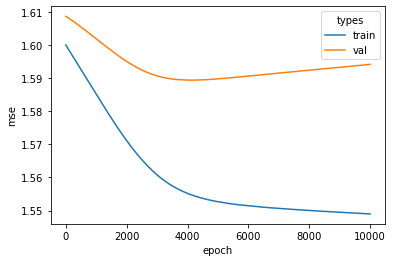

In [375]:
import seaborn as sns
sns.lineplot(data=com, x="epoch", y="mse", hue="types")

In [489]:
action["workerId"] + 1

0         1
1         2
2         3
3         1
4         1
         ..
586474    1
586475    1
586476    3
586477    1
586478    1
Name: workerId, Length: 137505, dtype: int64

In [459]:
sum(dat["label_1_x"] == 4)

3

In [458]:
sum(dat["label_1_x"] == 3)

26

In [457]:
sum(dat["label_1_x"] == 2)

31

In [456]:
sum(dat["label_1_x"] == 1)

73

In [315]:
model(torch.FloatTensor(np.array(X_train)))

tensor([[0.6940, 0.0269, 0.0228, 0.0770, 0.1793],
        [0.6973, 0.0263, 0.0225, 0.0765, 0.1775],
        [0.6961, 0.0265, 0.0226, 0.0767, 0.1781],
        [0.6966, 0.0264, 0.0225, 0.0766, 0.1778],
        [0.6994, 0.0259, 0.0222, 0.0759, 0.1766],
        [0.7143, 0.0234, 0.0209, 0.0722, 0.1692],
        [0.6932, 0.0270, 0.0229, 0.0774, 0.1795],
        [0.7081, 0.0245, 0.0214, 0.0734, 0.1726],
        [0.6955, 0.0266, 0.0226, 0.0768, 0.1784],
        [0.6947, 0.0268, 0.0227, 0.0770, 0.1789],
        [0.6953, 0.0266, 0.0227, 0.0770, 0.1784],
        [0.7639, 0.0159, 0.0161, 0.0585, 0.1455],
        [0.6996, 0.0259, 0.0222, 0.0759, 0.1763],
        [0.6932, 0.0270, 0.0229, 0.0774, 0.1795],
        [0.6958, 0.0266, 0.0226, 0.0767, 0.1783],
        [0.6966, 0.0264, 0.0225, 0.0766, 0.1778],
        [0.7059, 0.0248, 0.0216, 0.0741, 0.1736],
        [0.6932, 0.0270, 0.0229, 0.0774, 0.1795],
        [0.7039, 0.0251, 0.0218, 0.0747, 0.1745],
        [0.7021, 0.0255, 0.0220, 0.0751, 0.1753],


In [316]:
y_train

[[0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0,

In [355]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.0228,  0.0518, -0.0244, -0.0068,  0.1552, -0.0586,  0.2325, -0.1576,
          0.0608, -0.0448, -0.1907, -0.0896, -0.0351,  0.0677, -0.1465],
        [ 0.0844,  0.1123, -0.0997, -0.1356,  0.1067,  0.0539, -0.0389,  0.1001,
         -0.0280,  0.0637,  0.1787,  0.0503, -0.0011, -0.0508, -0.0201],
        [ 0.2433,  0.2241,  0.2019, -0.0471, -0.0113, -0.0275,  0.0678,  0.0069,
          0.1758, -0.1772,  0.1196, -0.0004,  0.0149, -0.1250,  0.0346],
        [-0.0007, -0.2350, -0.0204,  0.2479,  0.0779,  0.1672, -0.0738, -0.0937,
         -0.1706, -0.0886,  0.0018, -0.0847, -0.0130,  0.1997,  0.2472],
        [-0.1103, -0.0338, -0.1558,  0.0135, -0.1009, -0.2474, -0.1171,  0.2510,
         -0.1333,  0.1227, -0.0945, -0.1314, -0.0248,  0.0685,  0.0520],
        [ 0.0351,  0.0707,  0.2271,  0.1428,  0.0994,  0.1016, -0.0594, -0.0028,
         -0.2438,  0.1284, -0.0699,  0.0320,  0.1515,  0.0039,  0.0221],
        [-0.1692, -0.1578, -0.0579,  0.2270,  0.0863, 

In [343]:
torch.FloatTensor(np.array(X_test))

tensor([[ 3.,  0.,  1.,  1.,  0.,  3.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.],
        [ 3.,  0.,  1.,  1.,  0.,  2.,  1.,  1.,  1.,  1., -1.,  1.,  0.,  0.,
          1.],
        [ 3.,  0.,  2.,  1.,  0.,  2.,  1.,  2.,  2.,  0., -1.,  1.,  0.,  1.,
          0.],
        [ 5.,  0.,  3.,  1.,  0.,  7.,  0.,  4.,  2.,  0.,  2.,  0.,  1.,  1.,
          0.],
        [ 4.,  0.,  1.,  1.,  0.,  2.,  1.,  1.,  1.,  2., -2.,  1.,  0.,  0.,
          2.],
        [ 3.,  0.,  2.,  1.,  0.,  3.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.],
        [ 4.,  0.,  1.,  1.,  0.,  2.,  2.,  1.,  1.,  1., -2.,  2.,  0.,  0.,
          1.],
        [ 2.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  2., -1.,  0.,  0.,  0.,
          1.],
        [ 2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
          0.],
        [ 5.,  0.,  2.,  4.,  0.,  5.,  0.,  4.,  7.,  0.,  0.,  0.,  2.,  3.,
          0.],
        [ 5.,  0.,  1.,  1.,  0.,  2.,  0.,  1.,  1.,  1., -

In [261]:
y_pred.squeeze()

tensor([[0.1981, 0.2230, 0.1875, 0.2006, 0.1908],
        [0.1980, 0.2233, 0.1875, 0.2003, 0.1909],
        [0.1980, 0.2233, 0.1875, 0.2003, 0.1909],
        [0.1983, 0.2232, 0.1874, 0.2005, 0.1907],
        [0.1980, 0.2233, 0.1875, 0.2002, 0.1909],
        [0.1981, 0.2231, 0.1875, 0.2005, 0.1908],
        [0.1979, 0.2234, 0.1875, 0.2002, 0.1910],
        [0.1980, 0.2232, 0.1876, 0.2004, 0.1908],
        [0.1981, 0.2232, 0.1875, 0.2004, 0.1908],
        [0.1980, 0.2237, 0.1874, 0.1999, 0.1910],
        [0.1981, 0.2231, 0.1875, 0.2005, 0.1908],
        [0.1980, 0.2233, 0.1875, 0.2003, 0.1909],
        [0.1981, 0.2230, 0.1875, 0.2006, 0.1908],
        [0.1981, 0.2230, 0.1875, 0.2006, 0.1908],
        [0.1982, 0.2234, 0.1873, 0.2002, 0.1909],
        [0.1980, 0.2231, 0.1875, 0.2005, 0.1908],
        [0.1980, 0.2235, 0.1875, 0.2002, 0.1909],
        [0.1981, 0.2230, 0.1875, 0.2006, 0.1908],
        [0.1982, 0.2229, 0.1875, 0.2006, 0.1907],
        [0.1980, 0.2232, 0.1875, 0.2004, 0.1908],


In [235]:
y_train_1

0      2
1      4
2      3
3      1
4      5
      ..
187    3
188    5
189    5
190    5
191    5
Name: label_1_x, Length: 192, dtype: int64